#### *Cristina Cosma*

# **DATA SCIENCE**

## **Sprint 4 : Utilitzar les biblioteques de visualització de dades Matplotlib o Seaborn**

## Tasca M4 T01 - Exercicis gràfics amb Matplotlib i Seaborn

* Ús de les llibreries gràfiques
* Apendre a representar dades d'un Dataframe
* Ànalisis i extrapolació de les gràfiques

___________
Lliurament : Enviar l'URL a un repositori anomenat *visualització_exploratoria* que contingui la solució. S'ha d'entregar cada exercici en un mateix fitxer i en un repositori.

URL : **https://github.com/CristinaCosma/visualitzacio_exploratoria**
___________

## EXERCICI 1 : Resumeix estadísticament i gràficament el dataset *preu lloguer per trimestre i barri.csv* en la web OpenDataBCN.


In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


### **1.0 Visualització, resum del dataframe original i treballs previs**


* **Descarregant el Dataset en un Pandas Dataframe desde la ruta local per veure fer-se una idea les seves diverses parts:**

    - Es un dataframe que mostra dades de diverses propietats barceloneses que hi havia per lloguer l'any 2021. 
    - Per cada rang, tenim el any (2021), el trimestre (1-4), el codi i nom del seu districte, el codi i el nom del seu barri
    - Lloguer_mitja sembla ser un concepte per veure el lloguer per preu total mensual, o per bé per preu per superfície mensual 
    - Té 8 columnes, 584 entrades, que en un principi cap no és nul, que 4 variables són de tipus int64 i 4 són objectes o cadenes.

In [5]:
data = pd.read_csv('C:/Users/Buba/Documents/CURSOS-PROGRAMACION/IT-Academy/IT-DATA-SCIENCE/DS-Sprint4-Visual_Seaborn-Matplotlib/preu_lloguer_trimestre_barri.csv')
data


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [7]:
data.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri
count,584.0,584.000000,584.000000,584.000000
mean,2021.0,2.500000,6.246575,37.000000
std,0.0,1.118992,2.790726,21.089371
min,2021.0,1.000000,1.000000,1.000000
25%,2021.0,1.750000,4.000000,19.000000
50%,2021.0,2.500000,7.000000,37.000000
75%,2021.0,3.250000,8.000000,55.000000
max,2021.0,4.000000,10.000000,73.000000


* **A continuació veiem les dades mínimes i máximes per cada variable. En el cas de les cadenes, és per ordre alfaètic.**
    - Els districtes van de l'u al 10 i els barris, de l'u al 73.
    - Lloguer mitjà té al menys dos valors, ambdòs cadenes de text.
    - El preu en aquesta part ens mostra dades com ara '--' i el preu màxim de 998,8 € sembla massa baix coneixent la ciutat. 
    - El aspecte del preu tal com està imputat potser compliquin els càlculs i que probablement es tindràn que trasformar per treballar correctament.

In [8]:
data.max()

Any                                                      2021
Trimestre                                                   4
Codi_Districte                                             10
Nom_Districte                             Sarrià-Sant Gervasi
Codi_Barri                                                 73
Nom_Barri                                     les Tres Torres
Lloguer_mitja     Lloguer mitjà per superfície (Euros/m2 mes)
Preu                                                    998.8
dtype: object

In [9]:
data.min()

Any                                            2021
Trimestre                                         1
Codi_Districte                                    1
Nom_Districte                          Ciutat Vella
Codi_Barri                                        1
Nom_Barri                             Baró de Viver
Lloguer_mitja     Lloguer mitjà mensual (Euros/mes)
Preu                                             --
dtype: object

- **Tot i que algunes dades semblen manquants o inexactes, oficialment no figura cap valor nul**

In [10]:
data.count()

Any               584
Trimestre         584
Codi_Districte    584
Nom_Districte     584
Codi_Barri        584
Nom_Barri         584
Lloguer_mitja     584
Preu              584
dtype: int64

In [11]:
data.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

- **Veiem el nombre de valors únics per cada variable : interessa veure sobretot "Lloguer_mitja" i "Preu"**

In [12]:
data.nunique()

Any                 1
Trimestre           4
Codi_Districte     10
Nom_Districte      10
Codi_Barri         73
Nom_Barri          73
Lloguer_mitja       2
Preu              331
dtype: int64

- **Observem exactament quins són els valors únics de la variable "Preu", imprescindible per passar a les següent etapes**

In [13]:
# veure quantes dates úniques (331) n'hi han a la columna 'Preu' i com són : dtype=object, 'strings'
# es tindrá que canviar el tipus de variable del "Preu" a int64

data['Preu'].unique()

array(['759.2', '929.6', '808.9', '879.4', '918.0', '887.1', '1176.7',
       '1040.2', '964.0', '898.7', '781.6', '--', '810.6', '799.5',
       '778.4', '807.6', '788.1', '829.1', '990.3', '927.3', '1598.2',
       '1531.7', '1263.9', '1578.0', '1264.8', '1294.9', '990.1', '959.0',
       '745.4', '859.1', '910.6', '865.3', '817.3', '741.1', '791.7',
       '795.0', '668.8', '716.1', '700.5', '741.4', '827.0', '747.4',
       '736.5', '707.2', '687.2', '691.6', '762.5', '643.6', '631.6',
       '671.8', '605.0', '520.2', '625.1', '658.9', '759.3', '756.9',
       '824.2', '814.5', '853.6', '927.5', '1298.9', '928.5', '978.4',
       '704.2', '976.7', '794.6', '740.8', '12.8', '12.3', '15.5', '13.3',
       '12.9', '13.5', '13.0', '13.7', '13.6', '12.5', '11.6', '12.7',
       '12.2', '13.2', '13.8', '14.0', '15.7', '15.6', '16.0', '15.2',
       '14.3', '14.1', '14.2', '11.4', '11.8', '10.4', '11.2', '11.9',
       '11.3', '11.5', '11.0', '9.9', '9.3', '9.0', '10.7', '10.9',
       '

* **Veient el estat dels valors únics de preu, es decideix filtrar el datdframe original com a copia, per a qué tingui només els preus existents (que tinguin un valor real)**
    - Aquesta decisió es pren per poder analitzar dades amb exactitud
    - Es pren després de veure les preguntes de l'exercici, que proposen certes observacions per barri o districte, però sense exigir cap dels dos en concret
    - Es pren després de concloure que els districtes ón falten dades remandrán els més representats de totes maneres, amb dades superiors en nombre als altres 
    - Els preus '--' es mantenen al dataframe original, però es crea en paral·lel un altre amb les dades exactes per poder fer cálculs i comparacions.
    - Aquest dataframe té 540 entrades (44 menys que el original, que ens servirà igualment per treure informació de qualitat de les dades (que potser errors o manquances a les respostes rebudes)
    - El tipus se canvia de cadena de text / "object", a "float64" / número decimal

In [14]:
# decidir qué fer amb els preus '--' 

preu_existent=data[(data.Preu != '--')]

# convertir la consulta on totes les entrades sí contenen preus a un nou dataframe per poder treballar millor
preu_existent=pd.DataFrame(preu_existent)
preu_existent

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [15]:
# comprovem que s'han tret els que marquaven "--": 
# 540 entr canviar el tipus de variable del "Preu" a int64ies non-null (eren 584), dtypes: float64 (1)
# comprovem que el tipus de data dels preus s'ha transformat i canvià el tipus de variable de "Preu" cap a float64 :

preu_existent.Preu=preu_existent.Preu.astype('float64')
preu_existent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 38.0+ KB


* **Per decidir com seguir, veure quantes dates úniques n'hi han a la columna 'Lloguer_mitja' : són textos de conceptes i no de preus**
    - Dividim el nou dataframe amb els preus complerts, segons el input de la columna comuna: 
    
        "Lloguer_mitja": "Lloguer mitjà mensual (Euros/mes)" 
        
        "Lloguer mitjà per superfície (Euros/m2 mes)"
    - Ara cada columna només té els tipus de preus que li corresponen : €/m2 al mes, o bé € al mes

In [16]:
data['Lloguer_mitja'].unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

* **Consulta dels preus mensuals totals €/mes:**

In [17]:
mensual = preu_existent[(preu_existent.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)')]
mensual.sort_values(by=['Preu'], ascending=False)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
312,2021,3,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1816.5
166,2021,2,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1680.3
458,2021,4,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1679.3
20,2021,1,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1598.2
461,2021,4,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà mensual (Euros/mes),1597.4
...,...,...,...,...,...,...,...,...
346,2021,3,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),547.7
492,2021,4,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),546.8
54,2021,1,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),520.2
200,2021,2,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà mensual (Euros/mes),488.1


* **Consulta dels preus mensuals per superfície,o  €/m2/mes:**

In [18]:
m2_mes = preu_existent[(preu_existent.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)')]
m2_mes.sort_values(by=['Preu'], ascending=False)


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
532,2021,4,5,Sarrià-Sant Gervasi,22,"Vallvidrera, el Tibidabo i les Planes",Lloguer mitjà per superfície (Euros/m2 mes),18.0
285,2021,2,10,Sant Martí,67,la Vila Olímpica del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),17.3
139,2021,1,10,Sant Martí,67,la Vila Olímpica del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),17.3
433,2021,3,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),16.9
513,2021,4,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),16.4
...,...,...,...,...,...,...,...,...
565,2021,4,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),9.2
127,2021,1,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),9.0
267,2021,2,8,Nou Barris,49,Canyelles,Lloguer mitjà per superfície (Euros/m2 mes),8.7
273,2021,2,8,Nou Barris,55,Ciutat Meridiana,Lloguer mitjà per superfície (Euros/m2 mes),8.1


* **Consulta dels rangs de preus mensuals mínims i màxims de cada tipus, que ajuden a decidir els rangs dels gràfics a continuació :**

In [19]:
print('€/mes màxim :', mensual['Preu'].unique().max())
print('€/mes minim :',mensual['Preu'].unique().min())
print('€/m2/mes màxim:', m2_mes['Preu'].unique().max())
print('€/m2/mes minim:', m2_mes['Preu'].unique().min())

€/mes màxim : 1816.5
€/mes minim : 447.5
€/m2/mes màxim: 18.0
€/m2/mes minim: 6.7


### **1.1 Visualització d'una variable categòrica (Districte o Barri)**


- En aquesta primera part utilitzem el dataframe original que inclou els preus manquants, per deixar poder veure la proporció de dades reals 



In [20]:
# Totes les entrades del dataframe original per districtes

Districte=data.groupby(['Nom_Districte'])['Nom_Districte'].count()
Districte

Nom_Districte
Ciutat Vella            32
Eixample                48
Gràcia                  40
Horta-Guinardó          88
Les Corts               24
Nou Barris             104
Sant Andreu             56
Sant Martí              80
Sants-Montjuïc          64
Sarrià-Sant Gervasi     48
Name: Nom_Districte, dtype: int64

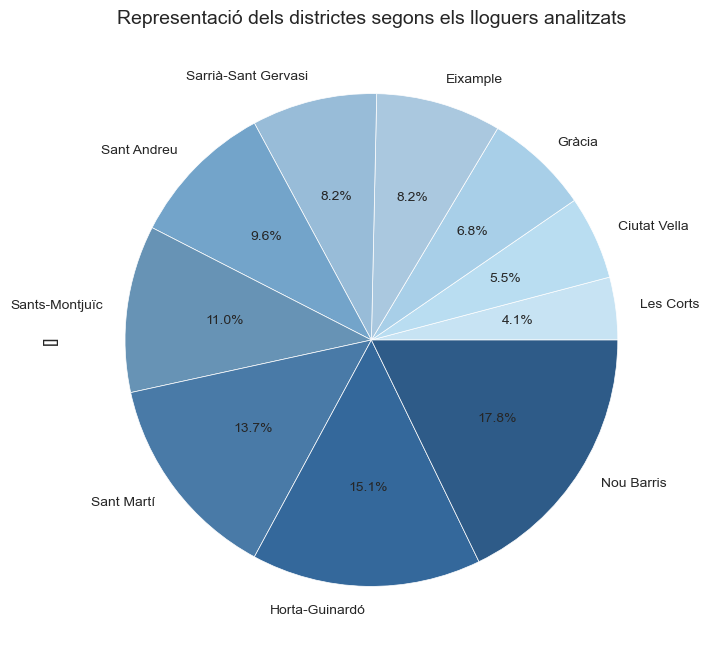

In [93]:
colors = ['#C7E3F3', '#B9DDF1', '#A8CFE8', '#AAC8DF','#98BCD8', '#73A4CA', '#6793B5','#497AA7', '#34689B', '#2E5B88'] 

Districte.sort_values(ascending=True).plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', fontsize=10, 
                                           colors=colors, wedgeprops={"linewidth" : 0.5, "edgecolor" : "white"})
plt.title('Representació dels districtes segons els lloguers analitzats', fontsize=14)
plt.ylabel([])  

# Exportar el gràfic:
plt.savefig('Sprint4_1.png', dpi=150, transparent=True)  

plt.show()

**Sobre el gràfic de tipus "pie":**
* Deixa constància de quina proporció de dades existeixen i representa en percentatge, la proporció que ocupa cada districte dins de l'estudi

* Els districtes menys representats en quant a nombre de lloguers són Les Corts, Ciutat Vella i Gràcia.

* A mig camí trobem l'Eixample i Sarrià-Sant-Gervasi, just derrere Sant Andreu.

* Els més presents: la meitat de les dades provenen de Nou Barris, Horta-Guinardó i Sant Martí ; amb Sants-Montjüic ja sumen més del 50% dels lloguers compilats

* La diversitat de la ciutat es nota en aquest dataframe i les diferències en les àrees de Barcelona generen diferències en les dades de la vivenda, tant pel nombre de lloguers disponibles que en els preus, o la exactitud de les dades recollides. 

* Aquestes diferències poden ser degudes a : ubicació, centralitat, poder adquisitiu, nivell educatiu en general, mobilitat versus estabilitat dels seus habitants, cultura de lloguer versus cultura de la propietat, densitat de població, densitat urbanística, etc.). 



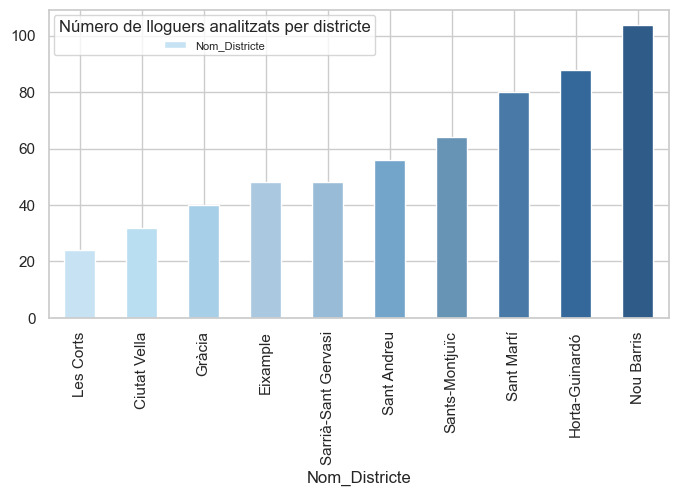

In [98]:
# Rang dels districtes per representació en nombre d'observacions acumulades en el dadaset original

Districte=data.groupby(['Nom_Districte'])['Nom_Districte'].count()

colors = ['#C7E3F3', '#B9DDF1', '#A8CFE8', '#AAC8DF','#98BCD8', '#73A4CA', '#6793B5','#497AA7', '#34689B', '#2E5B88']  # creamos una lista de dos colores
Districte.sort_values(ascending=True).plot(kind="bar", figsize = (8,4), color=colors) #creamos el plot con el df anterior 
plt.legend(title="Número de lloguers analitzats per districte", loc="upper left", fontsize=8)

# Exportar el gràfic:
plt.savefig('Sprint4_2.png', dpi=150, transparent=True) 

plt.show()

**Sobre el gràfic de tipus "bar":**

* Tot com al gràfic precedent, veiem que els districtes on el nombre de lloguers és minor, entre 25 i 40 pisos disponibles, són Les Corts, Ciutat Vella i Gràcia.
* A mig camí amb uns 50 pisos en lloguer estrobem l'Eixample i Sarrià-Sant-Gervasi, no lluny derrere Sant Andreu.
* Els que més resalten: Nou Barris, Horta-Guinardó i Sant Marti, que en tenen entre 80 i 104 cadascú lloguers disponibles


**A la propera secció comparem les dades complertes amb les manquantes**
- Hi ha 584 dades de vivendes en lloguer recopilades de les quals 540 tenen els preus disponibles i 44 venen sense informació del preu.
- Això es per poder veure la qualitat dels valors obtinguts en funció a la fracció que s'ha pogut extreurede les respostes i quina part no els té
- Ens donarà el rang dels districtes per qualitat de la informació (tant en lloguers mensuals que per preu/m2)
- I el calcul del percentatge de respostes complertes obtingudes, amb les que es treballarà desprès

In [103]:
# Només les entrades del dataframe degudament complertes, per districtes

Districte_respons=preu_existent.groupby(['Nom_Districte'])['Nom_Districte'].count()
Districte_respons

Nom_Districte
Ciutat Vella           32
Eixample               48
Gràcia                 40
Horta-Guinardó         80
Les Corts              24
Nou Barris             80
Sant Andreu            52
Sant Martí             80
Sants-Montjuïc         56
Sarrià-Sant Gervasi    48
Name: Nom_Districte, dtype: int64

In [104]:
preu_existent.groupby(['Nom_Districte'])['Nom_Districte'].count().sum()

540

In [24]:
# calcul del percentatge de respostes complertes obtingudes, amb les que es treballarà a continuació

percent_respons=Districte_respons/Districte*100
percent=percent_respons.round(0)
percent

Nom_Districte
Ciutat Vella           100.0
Eixample               100.0
Gràcia                 100.0
Horta-Guinardó          91.0
Les Corts              100.0
Nou Barris              77.0
Sant Andreu             93.0
Sant Martí             100.0
Sants-Montjuïc          88.0
Sarrià-Sant Gervasi    100.0
Name: Nom_Districte, dtype: float64

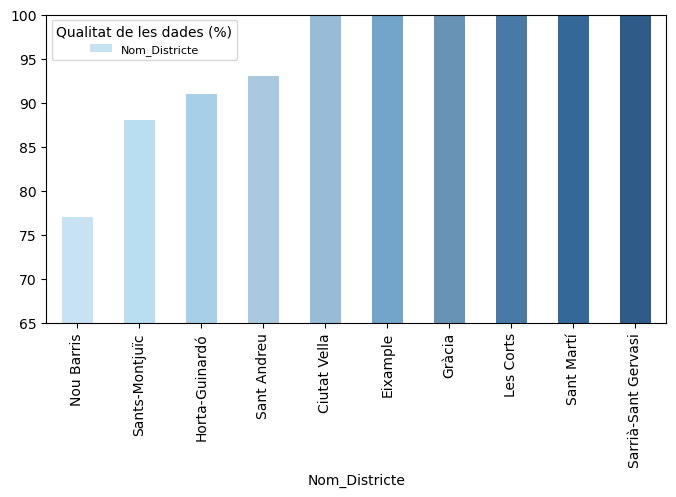

In [25]:
# Rang dels districtes per qualitat de la informació (tant en lloguers mensuals que per preu/m2)

percent.sort_values(ascending=True).plot(kind="bar", figsize = (8,4), color=colors)
plt.ylim(65, 100)
colors = ['#C7E3F3', '#B9DDF1', '#A8CFE8', '#AAC8DF','#98BCD8', '#73A4CA', '#6793B5','#497AA7', '#34689B', '#2E5B88']
plt.legend(title="Qualitat de les dades (%)", loc="upper left", fontsize=8)

# Exportar el gràfic:
plt.savefig('Sprint4_3.png', dpi=150, transparent=True) 

plt.show()


**Gràfic de qualitat de les dades recopilades:**   
- De les 584 dades de vivendes en lloguer recopilades, 540 tenen els preus disponibles i 44 venen sense informació del preu.
- S'observa que dels 10 districtes, 6 districtes (Eixample, Gràcia, Les Corts, Sant Martí, Sarrià-Sant-Gervasi) mostren un grau de resposta del 100 %. 
- S'observa que dels 10 districtes, 4 presenten dades amb incongruències o preus faltants, que poden ser dades perdutes o imputades malament dins el sistema.
- El districte de Nou Barris presenta un 77 % de dades útils, i per tant, un 23 % de dades amb preus erronis o nuls ; per a Sants-Montjüic la qualitat de les dades recopilades es de 88 % (per tant 22 % de manquançes) ; a Horta-Guinardó és del 91 % i a Sant Andreu, del 93 %.
- Veiem qu'allà on les recopilacions són més nombroses (zones de més densitat i també amb molta oferta de lloguer respecte als altres) és on hi ha un percentatge més grans d'errors, o dades buides i no terminades.
- Coincideix els disctictes tradicionalment més poblats i també més humils, on a part, veurem que els preus son més baixos que la resta (es comprovarà en excercicis posteriors)
- Les raons per no tenir els preus correctament poden ser múltiples i cal veure-les en un contexte. Poden ooriginar-se en el moment de recopilació por part dels enqüestats, per motius de confidencialitat, o pot ser que no s'hagin escrit bé dins la base de dades, o que s'hagin perdut després de fer l'enqüesta. 

### **1.2 Visualització per una variable numèrica (Preu)**


* En aquest estudi, s'ha decidit de mantenir simultàniament el grafics de preus de lloguer mensual per superfície i preus mensuals totals perquè ajuden molt a coneixer les raons de les preus, millores el entendiment de la situació i donen pistes sobre el tamany i el tipus de propietats que tenim davant. Per exemple, si un pis té un preu alt i el seu preu per superfície no ho es, podem pensar que es un pis gran o una casa ; si el metre quadrat d'un pis es molt alt però que el preu total es mitjà, pot ser un pis molt petit, bén ubicat i de disseny. 

* La diversitat de la ciutat es nota en aquest dataframe i les diferències en les àrees de Barcelona generen diferències en les dades de la vivenda, tant pel nombre de lloguers disponibles que en els preus, o la exactitud de les dades recollides. 

* Aquestes diferències poden ser degudes a : ubicació, centralitat, poder adquisitiu, nivell educatiu en general, mobilitat versus estabilitat dels seus habitants, cultura de lloguer versus cultura de la propietat, densitat de població, densitat urbanística, serveis al barri o existencia de prestacions i privats dins els edificis, etc.). 

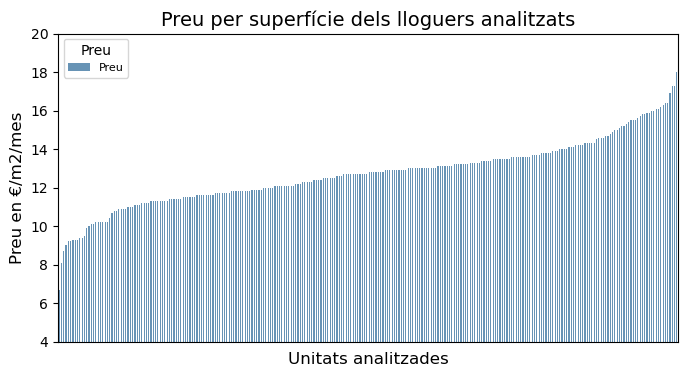

In [26]:
colors = ['#6793B5']
m2_mes['Preu'].sort_values(ascending=True).plot(kind="bar", figsize = (8,4), color=colors)

plt.legend(title="Preu", loc="upper left", fontsize=8)
plt.title('Preu per superfície dels lloguers analitzats', fontsize=14)
plt.xlabel('Unitats analitzades', fontsize=12)
plt.ylabel('Preu en €/m2/mes', fontsize=12)
plt.ylim(4, 20)
# disabling yticks by setting yticks to an empty list
plt.xticks([])  

# Exportar el gràfic:
plt.savefig('Sprint4_4.png', dpi=150, transparent=True) 

plt.show()


**Gràfic de preus mensuals per superfície :**

- Permet veure totes les dades de preu al m2 degudament omplertes unitat per unitat i la magnitud de les seves semblançes i diferències. 
- Es important donar-se compte de qu'aquest gráfic **no representa preu de les vivendes pel seu tamany, només el valor mitjà d'un metre quadrat de cada pis.**
- El gràfic en dona una idea del que podem comprovar fent una consulta manual (veure abaix i en la primera part d'aquest treball) : amb una barra unitaria per cada vivenda, visualitzem que el rang format per tots els preus de lloguer mensuals per superfície en el moment de es aproximadament del 6,50 a 18 €/m2/mes (concretament, de 6,70 a 18,00 €/m2/mes).
- El gràfic utilitza el dataset filtrat dels preus existents disponibles en el moment del estudi i mostra una gran quantitat de preus relativament homogenis, excepte en els extrems, tant el inferior con el superior. Això es pot explicar per el tipus de zona, el tipus de client o per el estat del pis : els preus més maixos per superfície poden ser edificis en un estat regular, en carrers / zones poc demandades, o casos de lloguers antics ; al contrari, on el preu per superfície es alt, la vivenda pot tenir uns acabats d'alta gama, situar-se en una zona exclusiva, en una zona comunitaria amb servei de porter, etc.
- A la part ezquerra del gràfic tenim uns quants pisos amb preus molt baixos per superfície, i com que el tamany aquí no es important, podríem concluir que es degut al estat general del pis i/o del edifici o del carrer on es troba.
- Recordem que al principi hem vist que el **50 % o més dels preus compilats eren de Nou Barris, Horta-Guinardò, Sants-Montjüic i de Sant Martí i això pot ecplicar en part que hi han molts preus baixos i pareguts, amb bastant competició entre sí** i per productes semblants.
- A la part dreta, al contrari, observem que alguns preus surten de la tendència i son molt més alts i com s'ha dit abans, les raons poden ser uns acabats d'alta gama, situació privilegiada, zona exclusiva, en una zona comunitaria amb servei de porter, lloguer a un públic nacional o estranger adinerat.

In [99]:
print('€/m2/mes màxim:', m2_mes['Preu'].unique().max())
print('€/m2/mes minim:', m2_mes['Preu'].unique().min())

€/m2/mes màxim: 18.0
€/m2/mes minim: 6.7


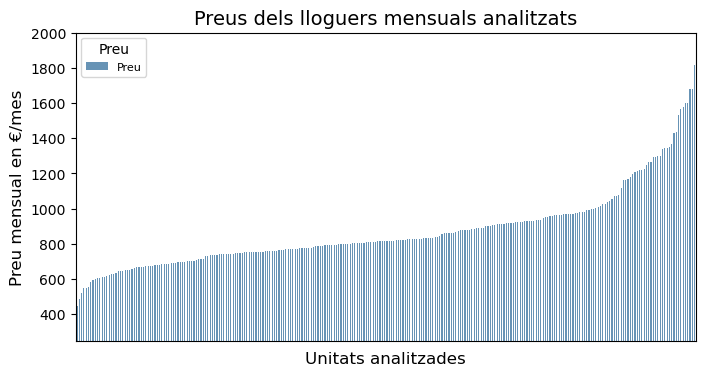

In [27]:
colors = ['#6793B5']

mensual['Preu'].sort_values(ascending=True).plot(kind="bar", figsize = (8,4), color=colors)
plt.legend(title="Preu", loc="upper left", fontsize=8)

plt.title('Preus dels lloguers mensuals analitzats', fontsize=14)
plt.xlabel('Unitats analitzades', fontsize=12)
plt.ylabel('Preu mensual en €/mes', fontsize=12)
plt.ylim(250, 2000)
plt.xticks([])  

# Exportar el gràfic:
plt.savefig('Sprint4_4.png', dpi=150, transparent=True) 

plt.show()

**Gràfic de "Preus dels lloguers mensuals analitzats"** :
- Permet veure totes les dades de preu total mensual per cada pis, sempre que el preu sigui disponible. 
- Es sembla al anterior, però aqui observem com van disparant-se les desigualtats entre pisos petits i grans, el seu estat i situació. 
- Aquest gráfic **representa el preu total de les vivendes, on indirectament sí que es té en compte el tamany**
- El gràfic il·lustra el que podem comprovar fent una consulta manual : els preus de lloguer mensuals en el moment de es aproximadament eren de 400 a 1800 €/mes (concretament, de 447,5 a 1816,5 €/mes).
- Les diferències són més impactants i resalten sobretot a la dreta del gàfic, es a dir en els preus més alts. Això té que veure amb no només l'estat de l'edifici, els acabats, quotes de comunitat més altes o més baixes, el poder adquisitiu del propietari i del client, sino també amb el tamany (superfície total). Això vol dir que en el extrem dret del gráfic hi han unaquantitat de pisos molt més grans que la resta, a més de, potser, presentar un estat general més dessitjable.
- Finalment, recordem de nou que el 50 % o més dels preus compilats eren de Nou Barris, Horta-Guinardò, Sants-Montjüic i de Sant Martí i el que hem comentat al respwcte ; en la part oposta, teniem uns districtes con ara Sarrià i Les Corts, que tenen poca o molt poca oferta de lloguer el mateix temps que son zones d'alt poder adquisitiu, amb pisos grans. La part dreta del gràfic, per tant, muy probablement està ocupada per aquestes propietats i d'altres en Sant Martí, que, com veurem, té preus baixos per alguns barris pisos, i molt alts en d'altres. 

In [101]:
print('€/mes màxim :', mensual['Preu'].unique().max())
print('€/mes minim :',mensual['Preu'].unique().min())

€/mes màxim : 1816.5
€/mes minim : 447.5


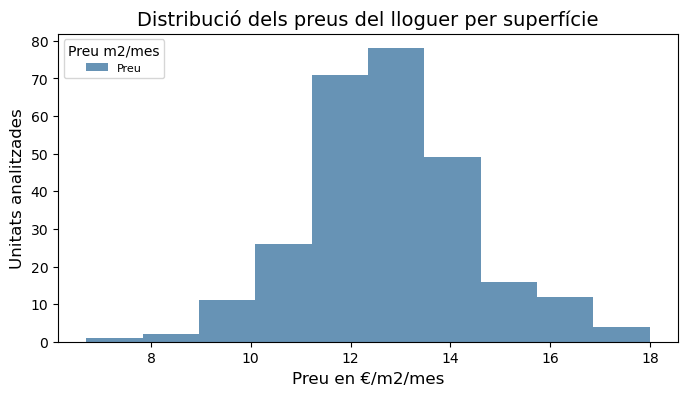

In [28]:
m2_mes['Preu'].plot(kind="hist", figsize = (8,4), color=colors) 

colors = ['#6793B5']
plt.legend(title="Preu m2/mes", loc="upper left", fontsize=8)
plt.title('Distribució dels preus del lloguer per superfície', fontsize=14)
plt.xlabel('Preu en €/m2/mes', fontsize=12)
plt.ylabel('Unitats analitzades', fontsize=12)

# Exportar el gràfic:
plt.savefig('Sprint4_6.png', dpi=150, transparent=True) 

plt.show()

**Histogram de preus per superfície :**
- El histògram aqui baix deriva del dataset utilitzat per el gràfic de barres "Preu en €/m2/mes", però agrupa i deixa més clares les categories de preus.
- Té una forma de campana invertida al centre, significant que els preus per superfície es distribueixen de forma bastant igualada com l'hem vist abans en el gràfic de barres.
- Entre la ezquerra i la dreta, el seu rang és de 6,70 a 18,00 €/m2/mes. La majoria de pisos es lloguen per 10 a 15 €/m2/mes, , amb una grandíssima quantitat de preus, quasi 200 dels 540 situats entre 11 i 14,5 €/m2/mes.
- A part de les explicacions d'abans sobre els aspectes que poder fer fluctuar les preus per superfície, podriem dir que segurament hi han molts pisos, incluant els edificis i els carrers on es situen, que es semblen. Coneixent Barcelona, molts barris de la meitat del segle XX (molts edificats entre els anys '60 y principis dels '90) presenten edificis pareguts d'una zona a l'altra amb, moltes vegades, pisos de característiques semblants des dels exteriors fins a les seves distribucions interiors.

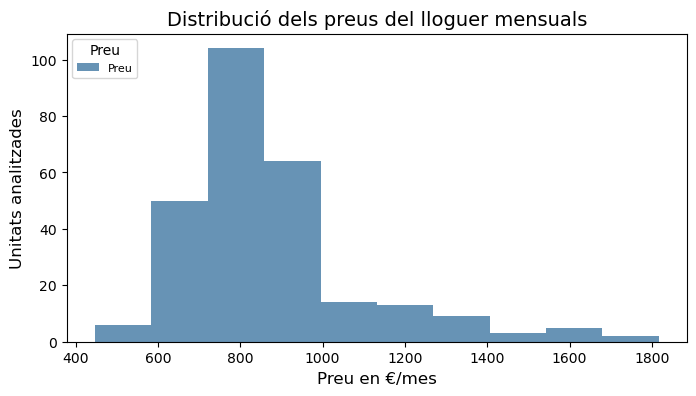

In [29]:
mensual['Preu'].plot(kind="hist", figsize = (8,4), color=colors)

colors = ['#6793B5']
plt.legend(title="Preu", loc="upper left", fontsize=8)
plt.title('Distribució dels preus del lloguer mensuals', fontsize=14)
plt.xlabel('Preu en €/mes', fontsize=12)
plt.ylabel('Unitats analitzades', fontsize=12)

# Exportar el gràfic:
plt.savefig('Sprint4_7.png', dpi=150, transparent=True) 

plt.show()

**Histogram de preus per preu de lloguer mensual :**
- El histògram aqui baix deriva del gràfic "Preu mensual en €/mes" i mostra que la gran majoria de pisos es lloguen per entre 600 i 1000 € mensuals, amb especial enfoc al voltant dels 800 € mensuals. 
- Al contrari del que passava en el histogram per superfíce, aquí la distribució no es central, sino que es queda a la part ezquerra, indiquant que una inmensa majoria de pisos en lloguer tenen preus baixos (a 1/3 del rang del dataset) i venen comprovant el que hem dit per el gràfic "pie" i el de barres simples : que té a veure amb els 4 districtes majoritaris en nombre, de classe "obrera", i que ofereixen vivendes i entorns bastant semblants d'una a l'altre.  
- Per altra banda, hi han uns pocs pisos de lloguer en els següents rangs que deuen ser més grans, més bé situats, amb prestacions interessants o de disseny, que formen la base del rang dels 1000-1800+ €, que poden ser del Eixample, Grácia, Sant Martí (Poblenou), Les Corts, Sarrià-Sant-Gervasi, Ciutat Vella (té pisos molt grans, amb història i de disseny, encara que la majoria siguin petits). 
- Els pisos sota 600 € o per sobra de 1500 € mensuals són casi excepcions en el moment de la recollida de dades.

### **1.3 Visualització per una variable numèrica i una categòrica (Districte i Preu)**


- En aquesta part observem com el preus i els districtes es corresponen i es complementen entre el histògram, els gràfics de distribució / densitat i el heatmap.
- Podem comprovar les mateixes tendències de distribució segons els llocs i els preus que ens anunciaven els dos histògrams anteriors:
- Ressalten que a Ciutat Vella, Sants-Montjuïc, Horta-Guinardó i Nous Barris es formen "picos", que indiquen que els preus són fortament marcats dins d'un rang concert.
- Sant Martí, Sarrià-Sant-Gervasi i Les Corts són els districtes amb els preus mès diversos, probablement degut als seus barris i tipus d'edificis mólt diferents entre si.

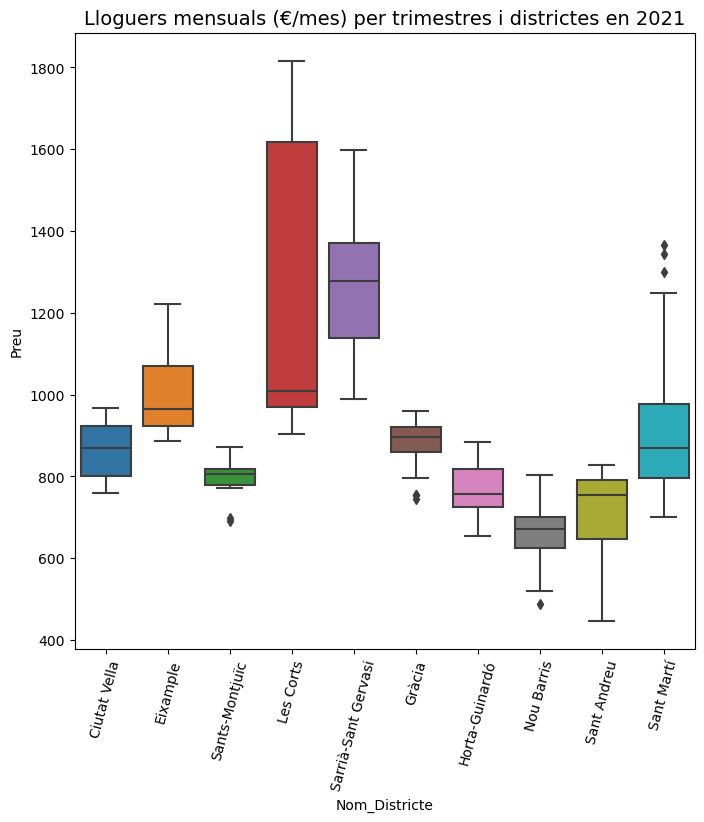

In [41]:
plt.figure(figsize=(8, 8))
sns.boxplot(x=mensual["Nom_Districte"], y=mensual["Preu"])

plt.title('Lloguers mensuals (€/mes) per trimestres i districtes en 2021', fontsize=14)
plt.tick_params(axis='x', rotation=75)

# Exportar el gràfic:
# plt.savefig('Sprint4_18.png', dpi=150, transparent=True) 

plt.show()

**Gràfic de blocs de preus de lloguer per districtes i mes:**
- Aquí comprovemm amb claritat el que s'anava comentant per contextualitzar els gràfics anteriors i podem veure com els districtes encaixen amb els preus dels lloguers. 
- Aquest gráfic no ens mostra quantitats de preus, sino que ens mostra al mateix temps la variabilitat de la informació, ressaltant la diversidad de cada districte, o bé la seva homogeneïtat : els preus més homogens son els de Sants-Montjuïc amb diferència, ancara que té molta oferta de lloguers, seguit de Gràcia, Horta-Guinardó i Ciutat Vella.
- Cal destacar que Les Corts té el rang més ampli de tots, encara que tingui pocs oferta. Es on els preus son més alts i la part baixa dels preus d'aquest districte correspondria a la part mig-alta o máxima de la resta de districtes; també, té molta varietet en el seu propi rang, amb una distribució anant dels 1000 als 1600 € mensuals com a norma general i es on trobem el máxim del dataset, amb 1800 €.
- Sarrià-Sant-Gervasi es diferent en el sentit de que el seu rang els mínims son molt més alts que a Les Corts, encara que els màxims no pujen tant. El seu rang normal es de 1200 a gairebé 1300 € ; té un máxim de 1600 però que no es mostra com excepcional.
- L'altre districte amb molta fluctuació es Sant Martí, on el rang total es de 700 fins als 1400 € mensuals, però de 1200 a 1400 son excepcions (nom-es 3 ofertes). Sant Martí té una majoria de preus entre 800 y 1000, però una part important tira cap a dalt, degut ala diferència entre els pisos de les zones més "obreres" i les més costeres i de nova construcció, dessitjades per gent local i també per els estrangers.
- La part baixa del dataset en particular, la representen, com era d'esperar, Nou Barris i Sant Andreu, seguits d'Horta-Guinardó, i part de Sant Martí.
- La tendencia mitjana está representada per Sants-Montjuïc, Ciutat Vella, Gràcia i part de Sant Martí.
- Els preus de l'Eixample está a la part mig-alta, mentre que Sants-Montjuïc és a la mitjana-baixa : els preus més alts de Sants-Montjuïc son els mes baixos per el Eixample.


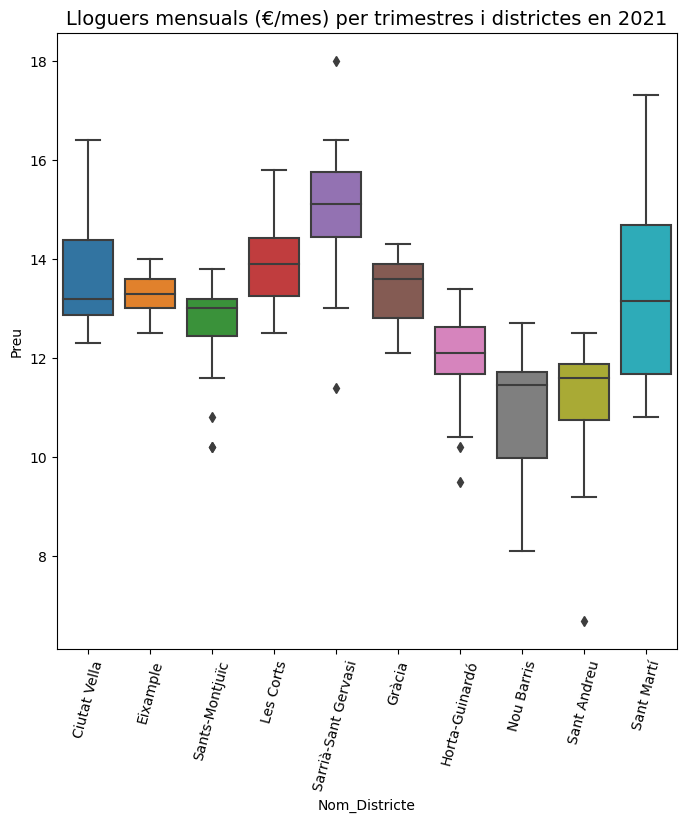

In [42]:
plt.figure(figsize=(8, 8))
sns.boxplot(x=m2_mes["Nom_Districte"], y=m2_mes["Preu"])

plt.title('Lloguers mensuals (€/mes) per trimestres i districtes en 2021', fontsize=14)
plt.tick_params(axis='x', rotation=75)

# Exportar el gràfic:
# plt.savefig('Sprint4_18.png', dpi=150, transparent=True) 

plt.show()


**Gràfic "boxplot de preus de lloguer per superficies i districtes :**
- Aquest gràfic complementa el anterior i deja més clar si els preus mensuals han sigut per la qualitat dels pisos, o també perel seu tamany
- En general observem que tot i que les diferències entre zones, els preus per metre quadrat fluctuen menys dind d'un mateix districte que els preus mensuals otals.
- On menys fluctuació s'observa es definitivament al Eixample, degut a la homogeneitat de les finques noucentistes, moltes construïdes en una època concreta i amb mides i distribucions paregudes. El comentari val per a Gràcia, encara que els edificis i carrers siguin molt diferents dels del Eixample, existeix una gran homogeneitat entre els edificis i la forma de vida dins el mateix districte.
- Cal destacar que per metre quadrat, hi ha una zona de preus comú a gairebé tots els districtes. Aquest preu está en torn als 12 euros (11,50 a 12,50 el m2), que per alguns es el seu máxim, per d'altres es el mínim, la excepció, o bé la seva normalitat. 
- Quan mirem el preu per superfície, veiem que el que el barri més car no és tant Les Corts, que per tenir segurament uns quants grans pisos havia disparat els preus mensuals ; el més car es clarament Sarrià-Sant-Gervasi. Després hi ha Sant Martí, probablement gracias a la seva oferta en posos d'alt standing a prop del mar i Ciutat Vella amb pisos cèntrics, històrics i de disseny que interessen al públic estranger, i desprès tenim Les Corts.
- A la part baixa dels preus mensuals de lloguer, igual que per els preus mensuals permetre quadrat, están invariablement Nou Barris, Sant Andreu i d'Horta-Guinardó, i part de Sant Martí en el cas dels pisos vells o situats en zones de polígons o de poca demanda en general.
- El gràfic mostra uns pocs casos d'excepció, quanson al alza poden ser pisos d'alta gama o que d'alguna forma destaquen per les seves característiques o les dels clients potencials. Potser també un propietari mal aconsellat, que demani massa diners, o més del que val el seu pis. En aquest cas, sent a Sarrià-Sant Gervasi, pot tratar-se d'un immoble de luxe.
- Les excepcions a la baixa son normalment pisos per reformar, o a vegades, també pot passar que si son pisos o cases molt grans, es tinguiu que baixar el preu per superfície per poder lloguer o vendre la propietat a un preu de mercat.

### **1.4 Visualització per dues variables numèriques (Any o Trimestre i Preu)**


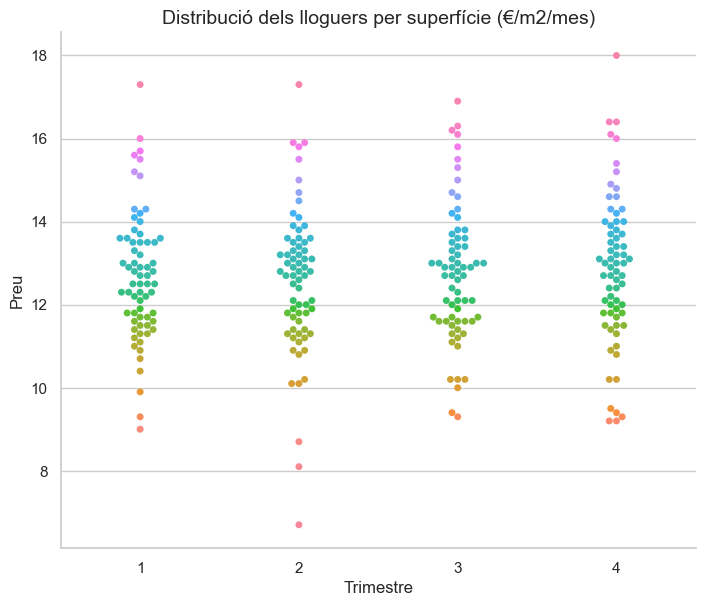

In [108]:
mensual = preu_existent[(preu_existent.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)')]
mensual.sort_values(by=['Preu'], ascending=False)

g=sns.catplot(data=m2_mes, x="Trimestre", y="Preu", hue="Preu", kind="swarm", height=6, aspect=1.2)
plt.title('Distribució dels lloguers per superfície (€/m2/mes)', fontsize=14)
g._legend.remove()

# Exportar el gràfic:
g.savefig('Sprint4_12.png')
plt.savefig('Sprint4_12.png', dpi=150, transparent=True) 

plt.show()

**Gràfic de categories de lloguers mensuals per trimestre :** 
- Mostra un punt per cada propietat en lloguer, però potser que d'un trimestre al altre alguns pisos siguin els mateixos si no s'han llogat. 
- Podem obdervar facilment en quantitat de pisos i magnitud de preus, on es situa la normalitat i també les excepcions.
- Veiem que la tendència principal al llarg dels quatre trimestres del 2021 es formar un nucli concentrat de 11 a 14,50 €/m2 al mes que a grans rasgos, no varia molt entre trimestres ; també per aixó podrien ser propietats noves que s'acullin als preus m2 principals del mercat local, o bé que estiguèssims veient les mateixes propietats amb petites variacions de preus, o sense. 
- Podem dir més en detall, que : 
    - Del primer trimestre destaquen els preus al voltant dels 13,50 €/m2 i dels 12,50 €/m2, amb una zona significativa de 11 a 12. Hi han tres pisos amb preus sota els 10 €/m2, possiblement que d'altra manera no trobarien clients, i dos a 16 €/m2 o més. 
    - En el segon trimestre hi han algunes baixades de preus i zones on els propietaris s'han "posat d'acord" entre 12,50 i 13,50 €/m2, i d'altres justament en 12 €/m2. Tenim tres pisos amb preus molt baixos que s'han quedat "aillats". Podrien ser els mateixos que al primer trimestre i que hagin baixat de preu per ser més "atractius".
    - En el tercer trimestre, hi ha menys dispersió per haver-se llogat, o que hagin renunciat a llogar-los, potser, si fossin pisos que estavan a reformar, per ejemple. Hi han tres lloguers a uns 10 €/m2 i res entre 10,25 i 11 €/m2. Els preus més freqüents son 11,50 i 13 €/m2 aprox. Hi han més ofertes de lloguer qu'abans a les parts altes del gràfic, amb un moviment per dalt de 14 €/m2 i fins i tot, dels 16€/m2. En canvi, el pis amb el preu més alt ha baixat de preu.
    - El quart trimestre presenta els preus més distribuits dins de la normalitat i no hi han preus molt baixos con abans, encara que cinq propietats es situen sobre els 9 euros i algu, o que el preu més alt hagi batut un rècord, de 11 a 15,50 €/m2 no hi han buids. Hi ha certa pujada de preus, amb menys ocurrències sota els 11,50 €/m2 i veiem que els 14 a 15€/m2 s'han normalitzat. Fins i tot, tenim preus per dalt de 16 i un que s'ha disparat.  

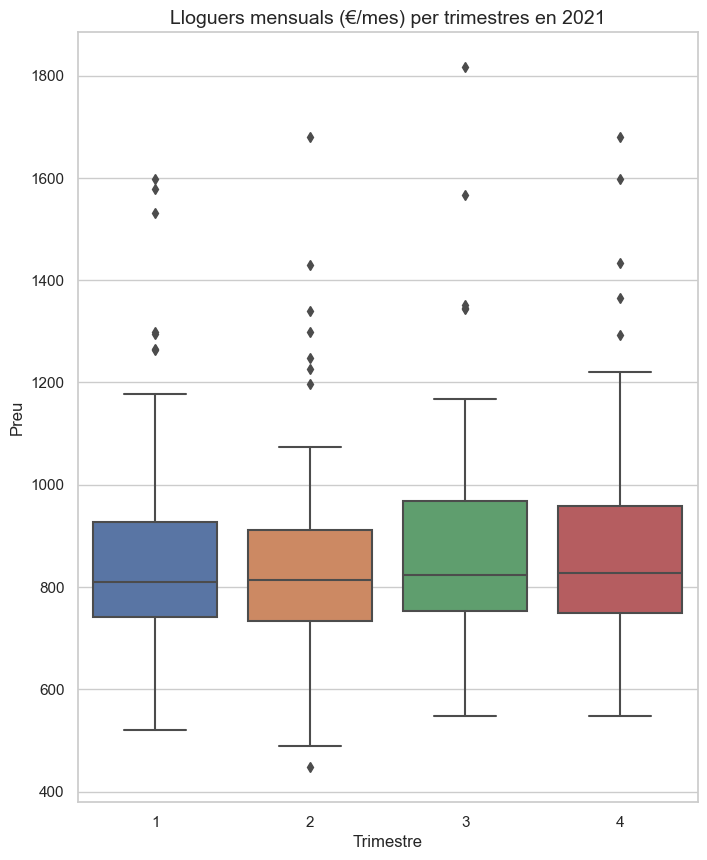

In [86]:
import seaborn as sns

plt.figure(figsize=(8, 10))
sns.boxplot(data=mensual, x="Trimestre", y="Preu")
plt.title('Lloguers mensuals (€/mes) per trimestres en 2021', fontsize=14)

# Exportar el gràfic:
#plt.savefig('Sprint4_14.png', dpi=150, transparent=True) 

plt.show()

**Gràfic tipus "boxplot" dels lloguers mensuals per trimestre:**
- Aquí, a més del que ja hem dit abans i de les hipòtésis que s'han fet, utilitzem aquest gràfic de blocs per veure en quins rangs es situa la massa de preus, que forma son els preus "normalitzats" : observem que canvia poc, però que en els dos primers trimestres està entre 725 i 925 € mensuals,  i durants el tercer i quart trimestres, es nota una petita pujada dels mínims i també dels màxims, d'uns 25 euros al mes per bona part dels lloguers (recordant que més de la meitat dels lloguers censats provenen dels districtes més humils). 
- Els valors mínims també pujen al llarg de l'any, sent el segon trimestre el que tira més cap a baix, però la situació es recupera al tercer trimestre i cap al quart, tot puja una mica encara.
- Veiem també bastants preus aïllats que surten de la normalitat de la seva zona cap a dalt : davant la demanda de lloguers, l'inflació i les condicions exigents dels contractants, potser que els clients estiguin disposats o es vegin obligats a pagar més ; també els clients es fan exigents en quant a prestacions i que paguin més per viure en pisos ben equipats, reformats o amb pàrking, etc. 
- A part, el gràfic anticipa la pujada de preus general i la del sou mínim.


### **1.5 Visualització per tres variables (Barri o Districte, Trimestre i Preu)**

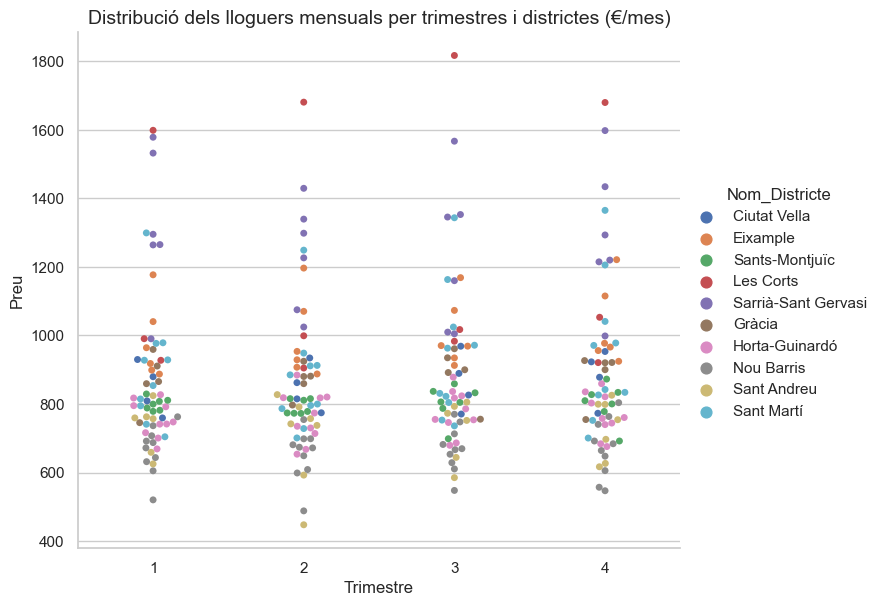

In [109]:
import seaborn as sns

mensual = preu_existent[(preu_existent.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)')]
mensual.sort_values(by=['Preu'], ascending=False)

sns.catplot(data=mensual, x="Trimestre", y="Preu", hue="Nom_Districte", kind="swarm", height=6, aspect=1.2)
plt.title('Distribució dels lloguers mensuals per trimestres i districtes (€/mes)', fontsize=14)

# Exportar el gràfic:
plt.savefig('Sprint4_13.png', dpi=150, transparent=True) 

plt.show()

**Gràfic de categories de lloguers mensuals per trimestre :** 
- Aquesta imatge mostra una situació igual a la del "boxplot" precedent, però amb del detall de cada lloguer individualment i diu a quin districte pertany.
- Tenim en els extrems un escenari molt semblant al del "boxplot" precedent amb preus que ja eren baixos per cada metre quadrat i ara els tenim també amb preus totals amb els quals s'han quedat "aillats" sota els 500 euros al segon trimestre y alguns entre 500 i 600 : aquest pisos son de Nou Barris i de Sant Andreu.
- Aquest gràfic mostra que la massa de preus es situa entre 700 i 1000 euros mensals i la resta son ofertes de lloguer més o menys aillades i de preus molt variats entre sí : a la part de baix hi han moltissims pisos de Nou Barris i de Sant Andreu, amb alguns d'Horta-Guinardó, entres que a dalt hi ha molta disparitat i allà trobem els de Sarrià-Sant Gervasi i uns pocs de Sant Martí i del Eixample. 
- El pis o casa més cara, en canvi, es de Les Corts.

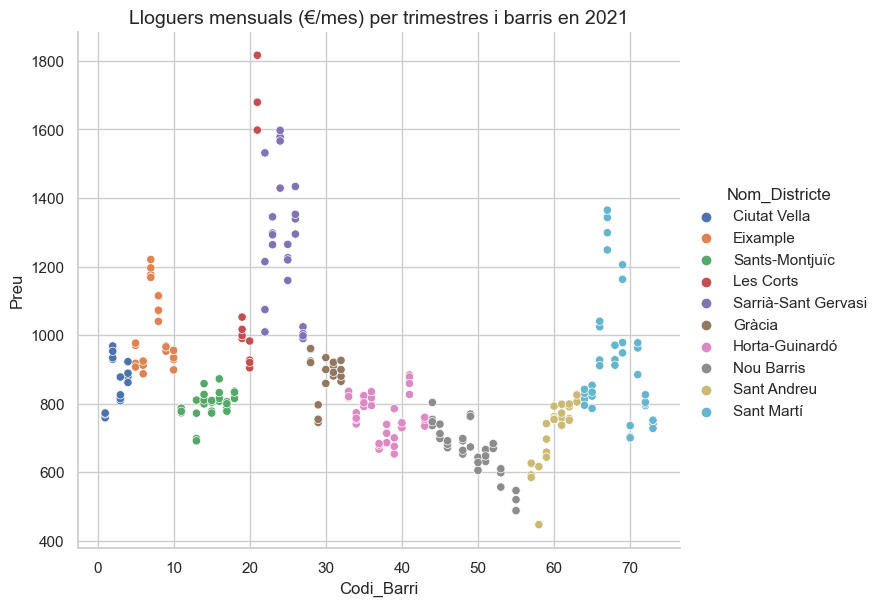

In [62]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.relplot(data=mensual, x="Codi_Barri", y="Preu", hue="Nom_Districte", height=6, aspect=1.2)
plt.title('Lloguers mensuals (€/mes) per barris i districtes', fontsize=14)

# Exportar el gràfic:
plt.savefig('Sprint4_17.png', dpi=150, transparent=True) 

plt.show()

**Gràfic de categories de lloguers mensuals per trimestre :** 
- Aquesta gràfica conté la mateixa informació que la precedent però sense deformar-la i ajuta a la seva verificació ja que l'exposa d'una manera completament diferent. 
- Si l'altra ens ajudaba a veure com evolucionen els preus durant l'any, aqui l'enfoc es als preus indivials agrupats per districtes. 
- Els colors formen petits grups amb el quals podem dir coses com que Les Corts té potser dues zones de preus, o més bé qu'un edifici excepcional hagi aparegut per lloguer durant aquell période, però la resta de pisos al districte tenen preus semblant al Eixample i als més barats de Sarrià-Sant Gervasi.


## Exercici 2 : Exporta les imatges en format .HTML o .PNG.


- S'han guardat els gràfics a partir de les seves celul·les corresponents amb alguns dels següents mètodes :

    - g.savefig('plot.png')

    - plt.savefig('plot.png', dpi=150)


## Exercici 3 : Proposa alguna visualització que creguis que pot resultar interessant.


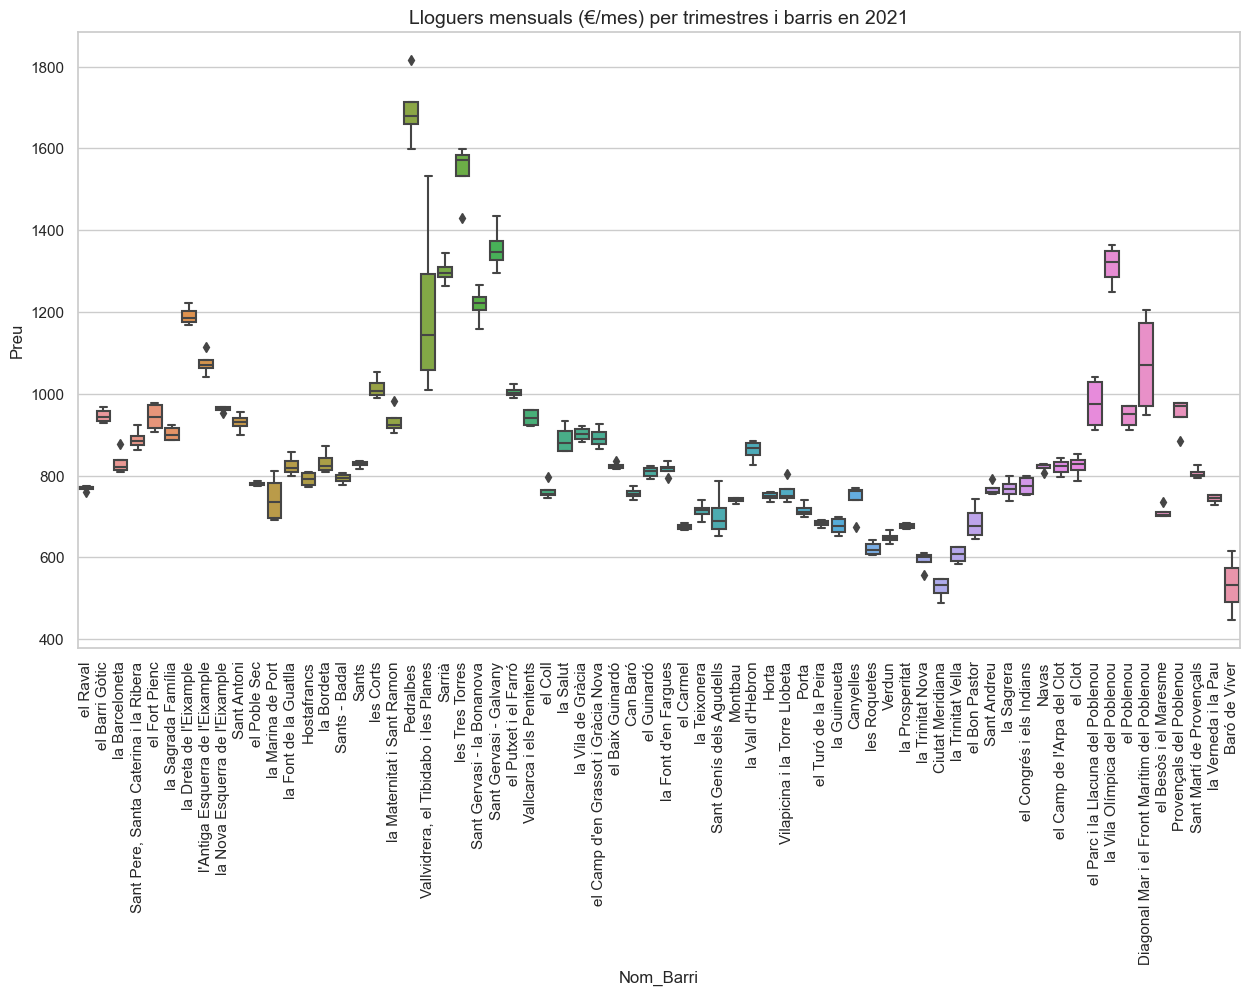

In [113]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=mensual["Nom_Barri"], y=mensual["Preu"])
plt.title('Lloguers mensuals (€/mes) per trimestres i barris en 2021', fontsize=14)
plt.tick_params(axis='x', rotation=90,)

# Exportar el gràfic:
# plt.savefig('Sprint4_18.png', dpi=150, transparent=True) 

plt.show()

**"Lloguers mensuals (€/mes) per barris" i "Lloguers mensuals per superfície i barris" analitzats conjuntament:**
- Es interessant comparar aquestes dues imatges ja que ens donen precisió i posen a prova les hipotesis que s'han anat fent.
- Veiem matissos : 
    - a Ciutat Vella, el Barri Gòtic ni als pisos històrics del Born es on hi han els preus més alts per mes de Ciutat vella, però que no surten de la norma ni son tan alts : s'ha de mirar cap a la Barceloneta i els seus preus per superfície per entendre que aquest barri sí es dels més cars de tota la ciutat, amb preus per metre quadrat de 16 €/m2/mes, iguals als de Sarrià-Sant Gervasi i de les zones més desitjades del Poblenou. Aquesta informació pot ser sorprenent quan pensem en el tipus d'edificis que s'hi troben, de barri antic i obrer i amb prestacions limitades, sense párking ni possibilitat de tenir-ne, etc. degut a les seves petites dimensions i al tipus de construcció. De fet, Barceloneta no destaca al gràfic de preus mensuals, només al de preus per superfície ; es perquè els pisos son molt petits (30-50 m2, els mès grans en tenen uns 70) i es per això que tot i que els alts preus demanats per cada metre, no generen preus sorprendentment alts respecte a la resta de la ciutat. 
    - També podem concluir que com a la Barceloneta, la proximitat al mar dels barris sud de Poblenou, la Vila Olìmpica, Diagonal Mar i fins i tot la Llacuna, es el que fa que alguns clients s'interessin tant per aquests barris. L Diagonal Mar, Vila Olimpica i la Llacuna, podem pensar que son vivendes bastant grans i amb màrking, ja que destaca per preus alts tant en m2 com a lloguer mensual.
    - Els barris on més es paga per metre quadrat son : Valvidrera, Tibidabo i Les planes, però amb moltíssima disparitat dins del mateix barri, potser degut al estat de les cases, la posta a punt o el valor històric que tenen. També pot influenciar el que es compta exactament com a superfície, degut que quan son cases amb jardí, les immobilièries sovint cpmptes aquest espais exteriors de manera diferent, no hi ha un concens.
    - Mensualment, en canvi, els preus més alts son als barris del mateix districte, que son : Pedralbes, Tres Torres, la Bonanova i Sant Gervasi Galvany amb Valvidrera, Tibidabo i Les planes a la par (aquest realment es més allunyat geograficament i es de muntanya, les seves grans cases no es venen fàcilment i potser que en materia de lloguer tenen un públic restringit).
    - A Horta, el barri Vall d'Hebron destaca tant en m2 que en preus mensuals degut a la presència d'hospitals i atreu mèdics i gent amb bons ingressos.
    - Els preus més baixos en ambdòs gràfics es troba a Baró de Viver (Nou Barris), Ciutat Meridiana (Sant Andreu), i en Montjuïc, el barri de la Marina del Port, molt industrial i bastant vell encara que ja se està edificant novament en algunes parts, es un barri "mariner" sense accès al mar, molt vell edificat a prop del cementeri, i de les vies de tren de mercaderies.

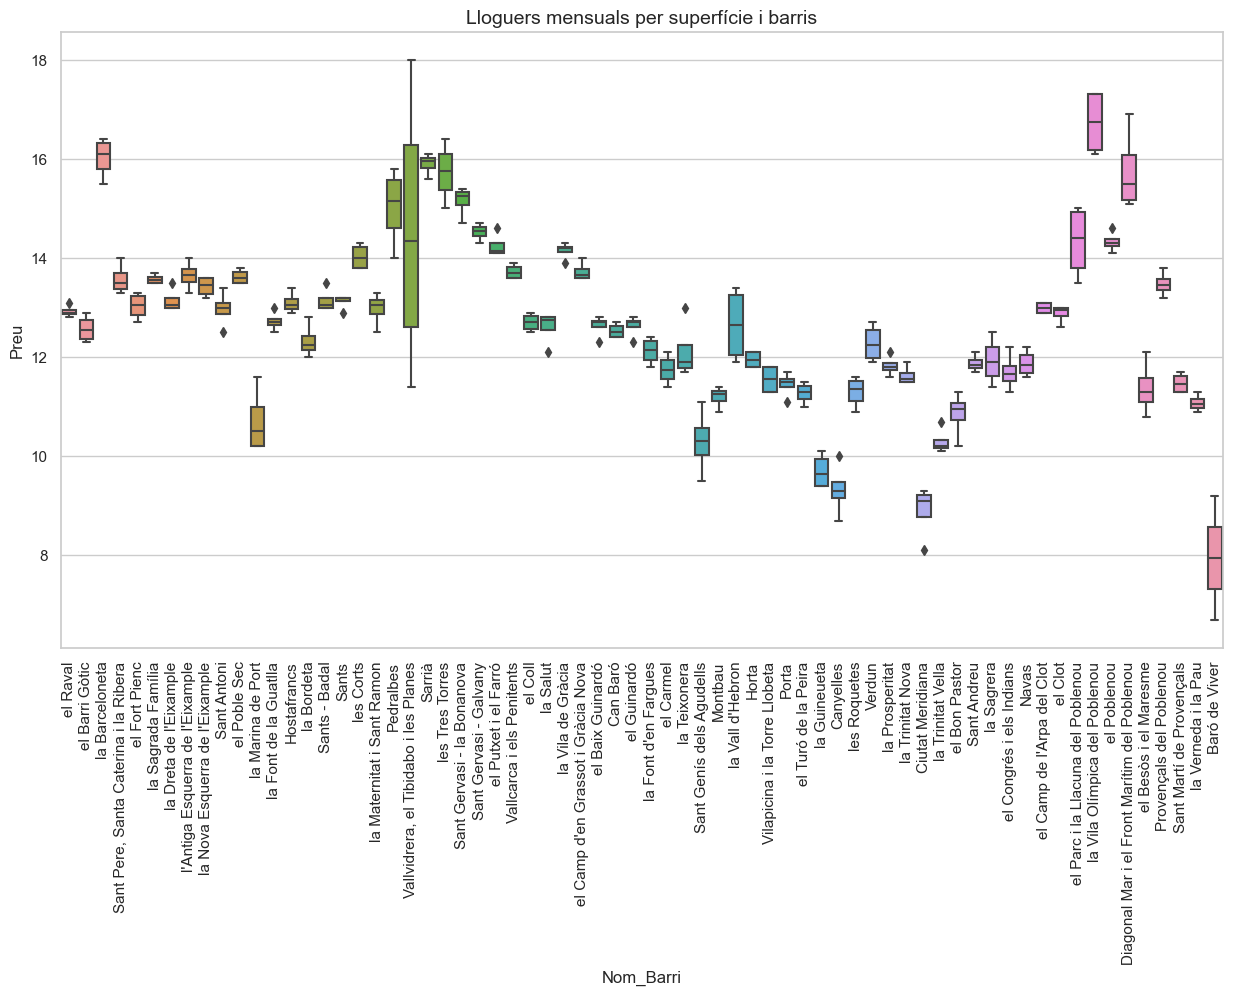

In [112]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=m2_mes["Nom_Barri"], y=m2_mes["Preu"])
plt.title('Lloguers mensuals per superfície i barris', fontsize=14)
plt.tick_params(axis='x', rotation=90,)

# Exportar el gràfic:
# plt.savefig('Sprint4_18.png', dpi=150, transparent=True) 

plt.show()